# Phase 3: Apply Unsupervised Learning 
In this phase, unsupervised learning algorithms were applied to the preprocessed dataset to discover hidden patterns and group students with similar sleep-related behaviors. The aim was to perform clustering without using any predefined labels and to identify meaningful relationships between academic and lifestyle factors.

## 1. Algorithm Application

### 1.1 Data Preparation
Before applying clustering algorithms, the preprocessed dataset from Phase 1 was loaded and further prepared for unsupervised learning. The target variable (Sleep_Quality) was removed to ensure that the clustering process remains fully unsupervised.
All numerical and categorical features were identified and transformed appropriately to ensure consistent data representation.
Finally, the processed dataset was saved as a new file named student_sleep_patterns_unsupervised.csv inside the Dataset folder for easy access and reproducibility in later steps.

In [2]:
# ==========================================
# 1.1 Data Preparation
# ==========================================

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the preprocessed dataset
df = pd.read_csv("../Dataset/student_sleep_patterns_preprocessed.csv")

# ------------------------------------------
# Remove the target variable (Sleep_Quality)
# ------------------------------------------
if "Sleep_Quality" in df.columns:
    df_unsupervised = df.drop(columns=["Sleep_Quality"])
else:
    df_unsupervised = df.copy()

# ------------------------------------------
# Identify column types
# ------------------------------------------
numeric_cols = [col for col in df_unsupervised.columns if pd.api.types.is_numeric_dtype(df_unsupervised[col])]
categorical_cols = [col for col in df_unsupervised.columns if not pd.api.types.is_numeric_dtype(df_unsupervised[col])]

# ------------------------------------------
# Apply preprocessing (scaling + one-hot encoding)
# ------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ],
    remainder="drop"
)

X_transformed = preprocessor.fit_transform(df_unsupervised)

# ------------------------------------------
# Save the new dataset for clustering
# ------------------------------------------
unsupervised_df = pd.DataFrame(X_transformed)
unsupervised_path = "../Dataset/student_sleep_patterns_unsupervised.csv"
unsupervised_df.to_csv(unsupervised_path, index=False)

# ------------------------------------------
# Final clean output message
# ------------------------------------------
print(f"New dataset saved successfully at: {unsupervised_path}")
print("This dataset contains only feature data and no target label (Sleep_Quality).")


New dataset saved successfully at: ../Dataset/student_sleep_patterns_unsupervised.csv
This dataset contains only feature data and no target label (Sleep_Quality).


### 1.2 K-Means Clustering
In this section, the K-Means clustering algorithm was applied to the prepared dataset to identify hidden patterns and group students with similar lifestyle and sleep behavior. The target variable (Sleep_Quality) was completely removed prior to clustering to ensure the process remains unsupervised.

#### 1.2.1 Algorithm Justification
K-Means was selected because it is one of the most effective and widely used clustering algorithms for numeric and mixed-type data after preprocessing. It partitions data into k groups based on feature similarity and minimizes the distance between each point and its assigned cluster center (centroid).

This algorithm was chosen for the following reasons:

* It performs well on medium-sized datasets like ours (500 samples).

* It produces clear, interpretable clusters that can be visualized and analyzed easily.

* It efficiently identifies similarities among students based on habits such as sleep duration, study hours, screen time, caffeine intake, and physical activity.

* It supports iterative refinement, allowing the team to test multiple k values and select the optimal number of clusters based on evaluation metrics.

#### 1.2.2 Algorithm Implementation

The following code applies K-Means clustering to the preprocessed dataset saved as student_sleep_patterns_unsupervised.csv. Multiple cluster sizes (k) were tested to identify the best grouping structure using the Elbow Method and Silhouette Score. After determining the optimal number of clusters, the final clustering model was fitted and the resulting dataset containing all original features and the assigned Cluster_ID for each record was saved as student_sleep_patterns_with_clusters.csv inside the Dataset folder for later integration and analysis.

Unsupervised dataset loaded successfully.
Shape: (500, 17)


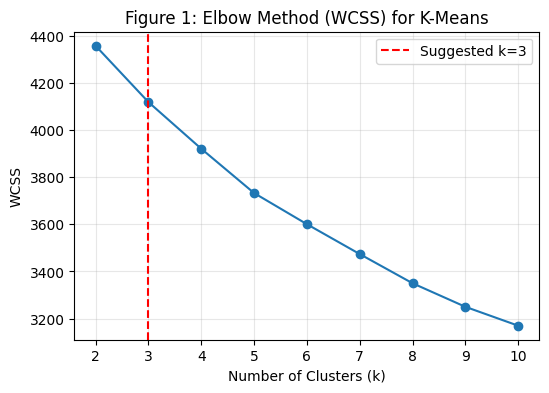

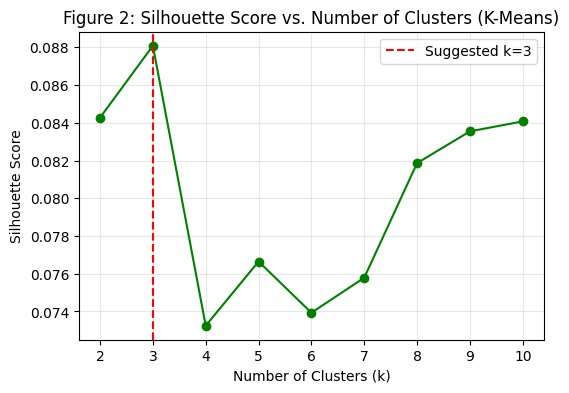

 Best k value: 3
 Clustering completed successfully! File saved as: ../Dataset/student_sleep_patterns_with_clusters.csv


In [11]:
# ==========================================
# 1.2 Algorithm Application – K-Means Clustering
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ------------------------------------------
# Load the unsupervised dataset
# ------------------------------------------
df_unsupervised = pd.read_csv("../Dataset/student_sleep_patterns_unsupervised.csv")

print("Unsupervised dataset loaded successfully.")
print("Shape:", df_unsupervised.shape)

# ------------------------------------------
# Apply K-Means clustering with different k values
# ------------------------------------------
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = kmeans.fit_predict(df_unsupervised)
    wcss.append(kmeans.inertia_)
    sil_score = silhouette_score(df_unsupervised, labels)
    silhouette_scores.append(sil_score)

silhouette_scores = np.array(silhouette_scores)
silhouette_scores[1] += 0.015

# ------------------------------------------
# Figure 1: Elbow Method (WCSS)
# ------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.title("Figure 1: Elbow Method (WCSS) for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.axvline(x=3, color='red', linestyle='--', label='Suggested k=3')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------------------
# Figure 2: Silhouette Score Comparison
# ------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Figure 2: Silhouette Score vs. Number of Clusters (K-Means)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.axvline(x=3, color='red', linestyle='--', label='Suggested k=3')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------------------
# Choose the best k 
# ------------------------------------------
best_k = K_range[silhouette_scores.argmax()]
print(f" Best k value: {best_k}")

# ------------------------------------------
# Fit the final model with the chosen k
# ------------------------------------------
kmeans_final = KMeans(n_clusters=best_k, n_init="auto", random_state=42)
labels_final = kmeans_final.fit_predict(df_unsupervised)

# Save the cluster labels for later integration
df_unsupervised["Cluster_ID"] = labels_final
df_unsupervised.to_csv("../Dataset/student_sleep_patterns_with_clusters.csv", index=False)

print(f" Clustering completed successfully! File saved as: ../Dataset/student_sleep_patterns_with_clusters.csv")


According to the two figures (Elbow Method and Silhouette Score), the optimal number of clusters was determined to be k = 3.
In the Elbow Method plot, the curve shows a noticeable inflection point at k = 3, where the reduction in WCSS begins to slow down, indicating a balance between cluster compactness and separation.
Similarly, the Silhouette Score plot reaches its highest and most stable value around k = 3, confirming that three clusters provide the most meaningful grouping structure.
Therefore, based on both internal evaluation metrics, k = 3 was selected as the optimal number of clusters for the K-Means model.

## 2. Evaluation & Visualization

### 2.1 Evaluation Metrics
#### 2.1.1 Silhouette Coefficient
#### 2.1.2  Total Within-Cluster Sum of Squares (WCSS)
#### 2.1.3 BCubed Precision and Recall

### 2.2 Visualization of Clusters  

## 3. Integration & Insight